In [8]:
import scanpy as sc
from anndata import AnnData
import numpy as np
# import requires setting a PYTHONPATH with the data_import directory
import h5ad_preparation as prep
import pandas as pd

In [9]:
url = "https://hosted-matrices-prod.s3-us-west-2.amazonaws.com/Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection-25/Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection.h5ad"
adata = prep.get_h5ad_from_url(url, "blood_covid")

  0%|          | 0.00/1.57G [00:00<?, ?B/s]

In [10]:
prep.jupyter_h5ad_overview(adata)

,Admission,ClusterID,DPS,DTF,Donor_full,HLA1,IFN1,Sex,Status,Ventilated,cell_type_coarse,cell_type_fine,nCount_RNA,nCount_SCT,nFeature_RNA,nFeature_SCT,percent_mt,percent_rpl,percent_rps,percent_rrna,seurat_clusters,singler
covid_555_1.1,ICU,13,9,9,C1 A,-0.026053,0.015625,M,COVID,NonVent,RBC,RBC,1222.0,1682.0,125,126,1.309329,0.245499,0.081833,46.644844,12,Erythroblast
covid_555_1.2,ICU,10,9,9,C1 A,0.023525,-0.000322,M,COVID,NonVent,B,Class-switched B,1099.0,1700.0,160,160,13.102820,0.363967,0.363967,58.780708,9,B_cell
covid_555_1.3,ICU,19,9,9,C1 A,-0.044271,0.086385,M,COVID,NonVent,PB,IgG PB,1055.0,1661.0,212,213,2.938389,0.947867,0.663507,55.829384,18,B_cell
covid_555_1.7,ICU,10,9,9,C1 A,-0.038040,0.022590,M,COVID,NonVent,B,Class-switched B,2411.0,1971.0,312,312,10.908337,0.165906,0.041477,67.399422,9,B_cell
covid_555_1.8,ICU,22,9,9,C1 A,-0.043605,0.010739,M,COVID,NonVent,PB,IgA PB,2276.0,1948.0,336,336,11.203866,0.307557,0.263620,67.355011,21,B_cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HIP045.2543,N/A,7,0,0,H6,0.588374,0.092001,M,Healthy,Healthy,CD14 Monocyte,CD14 Monocyte,6103.0,1959.0,2460,1080,6.898247,3.637555,2.867442,10.797968,6,Monocyte
HIP045.2544,N/A,21,0,0,H6,1.295145,0.045697,M,Healthy,Healthy,DC,DC,7324.0,2088.0,2488,1031,6.485527,6.157837,4.929000,12.738940,20,Monocyte
HIP045.2545,N/A,21,0,0,H6,0.892457,0.062819,M,Healthy,Healthy,DC,DC,6368.0,1929.0,2511,1021,4.742462,6.171483,4.978015,14.400126,20,T_cells
HIP045.2546,N/A,11,0,0,H6,0.020954,0.036953,M,Healthy,Healthy,CD16 Monocyte,CD16 Monocyte,6669.0,1918.0,2650,1063,4.573400,3.328835,2.998950,14.574899,10,Monocyte


,Selected,sct_detection_rate,sct_gmean,sct_residual_mean,sct_residual_variance,sct_variable,sct_variance
5S-rRNA,0.0,0.000261,0.000189,0.000651,1.164300,0,0.000321
7SK,0.0,0.027394,0.020371,0.005464,1.062872,0,0.035997
A1BG,0.0,0.001785,0.001268,0.002331,1.063613,0,0.002062
A1BG-AS1,0.0,0.000501,0.000356,0.001971,1.150165,0,0.000561
A1CF,0.0,0.001324,0.000942,0.002839,1.158183,0,0.001502
...,...,...,...,...,...,...,...
UGT2B17,0.0,0.001163,0.000859,-0.001669,0.938646,0,0.001663
Vault,0.0,0.000201,0.000139,-0.002708,0.750773,0,0.000201
XX-CR54.1,0.0,0.000221,0.000153,-0.002593,0.731583,0,0.000221
XXbac-B135H6.18,0.0,0.000983,0.000706,0.000535,1.047113,0,0.001162


(44721, 26361)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

(44721, 26361)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(44721, 26361)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(44721, 26361)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

OverloadedDict, wrapping:
	{'assay': 'Seq-Well', 'authors': array(["{'name': 'Aaron J Wilk'}", "{'name': 'Arjun Rustagi'}",
       "{'name': 'Nancy Q Zhao'}", "{'name': 'Jonasel Roque'}",
       "{'name': 'Giovanny J Martinez-Colon'}",
       "{'name': 'Julia L McKechnie'}", "{'name': 'Geoffrey T Ivison'}",
       "{'name': 'Thanmayi Ranganath'}", "{'name': 'Rosemary Vergara'}",
       "{'name': 'Taylor Hollis'}", "{'name': 'Laura J Simpson'}",
       "{'name': 'Philip Grant'}", "{'name': 'Aruna Subramanian'}",
       "{'name': 'Angela J Rogers', 'email': 'ajrogers@stanford.edu'}",
       "{'name': 'Catherine A Blish', 'email': 'cblish@stanford.edu'}"],
      dtype=object), 'disease': array(['COVID-19', ''], dtype=object), 'organism': 'Homo sapiens', 'preprint': {'date': '2020-04-23', 'doi': 'https://doi.org/10.1101/2020.04.17.20069930', 'title': 'A single-cell atlas of the peripheral immune response to severe COVID-19'}, 'short_name': 'Single_cell_atlas_of_peripheral_immune_response_t

20230111-084215.739 12182 INFO root:93 make_sparse: conversion to sparse matrix done
20230111-084230.692 12182 INFO root:118 make_norm_expression: no transformations necessary


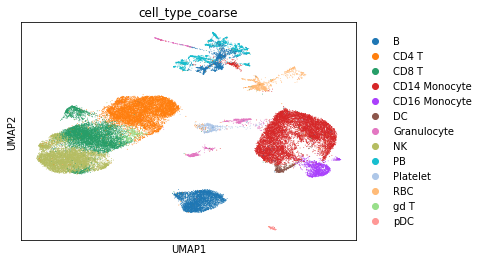

In [11]:
prep.remove_raw_and_layers(adata)
prep.make_sparse(adata)
prep.filter_outliers(adata)
prep.make_norm_expression(adata)

prep.add_umap(adata)
sc.pl.umap(adata, color='cell_type_coarse')

In [5]:
prep.calculate_differentially_expressed_genes(adata, ['cell_type_coarse','cell_type_fine'])

diff.exp. genes: 100%|██████████| 2/2 [00:59<00:00, 29.66s/it]
20230111-083238.142 12182 INFO root:278 calculate_differentially_expressed_genes: found a list of genes for these attributes: ['CellType', 'BroadCellType']


,names,scores,logfoldchanges,pvals,pvals_adj,ref_attr_value,cmp_attr_value,attribute_name
0,CSTB,77.817535,1.412415,0.000000,0.000000,Luminal_Macrophages,_OTHERS_,CellType
1,CTSD,76.475533,1.784404,0.000000,0.000000,Luminal_Macrophages,_OTHERS_,CellType
2,GPNMB,76.200821,3.385508,0.000000,0.000000,Luminal_Macrophages,_OTHERS_,CellType
3,APOC1,73.483475,2.969045,0.000000,0.000000,Luminal_Macrophages,_OTHERS_,CellType
4,ACP5,71.897850,2.952302,0.000000,0.000000,Luminal_Macrophages,_OTHERS_,CellType
...,...,...,...,...,...,...,...,...
3224,BAZ1A,2.316792,1.691065,0.020515,0.999121,Basal,_OTHERS_,BroadCellType
3225,CDK9,2.311717,2.722002,0.020793,0.999121,Basal,_OTHERS_,BroadCellType
3226,LDHB,2.307086,0.869298,0.021050,0.999121,Basal,_OTHERS_,BroadCellType
3227,KRT5,2.306997,11.309298,0.021055,0.999121,Basal,_OTHERS_,BroadCellType


# final h5ad file

In [12]:
prep.set_cellenium_metadata(
    adata,
    title='A single-cell atlas of the peripheral immune response in patients with severe COVID-19',
    description='To elucidate pathways in peripheral immune cells that might lead to immunopathology or protective immunity in severe COVID-19, we applied single-cell RNA sequencing (scRNA-seq) to profile peripheral blood mononuclear cells (PBMCs) from seven patients hospitalized for COVID-19, four of whom had acute respiratory distress syndrome, and six healthy controls.',
    taxonomy_id=9606,
    ncit_tissue_ids=['C12434'],
    mesh_disease_ids=['D000086382', 'D012128'],
    X_pseudolayer_name='norm_log_expression',
    main_sample_attributes=['cell_type_coarse','cell_type_fine','Status','Ventilated']
)   

In [13]:
adata.write(prep.basedir.joinpath("blood_covid.h5ad"))
prep.jupyter_h5ad_overview(adata)

,Admission,ClusterID,DPS,DTF,Donor_full,HLA1,IFN1,Sex,Status,Ventilated,cell_type_coarse,cell_type_fine,nCount_RNA,nCount_SCT,nFeature_RNA,nFeature_SCT,percent_mt,percent_rpl,percent_rps,percent_rrna,seurat_clusters,singler,n_genes
covid_555_1.3,ICU,19,9,9,C1 A,-0.044271,0.086385,M,COVID,NonVent,PB,IgG PB,1055.0,1661.0,212,213,2.938389,0.947867,0.663507,55.829384,18,B_cell,213
covid_555_1.7,ICU,10,9,9,C1 A,-0.038040,0.022590,M,COVID,NonVent,B,Class-switched B,2411.0,1971.0,312,312,10.908337,0.165906,0.041477,67.399422,9,B_cell,312
covid_555_1.8,ICU,22,9,9,C1 A,-0.043605,0.010739,M,COVID,NonVent,PB,IgA PB,2276.0,1948.0,336,336,11.203866,0.307557,0.263620,67.355011,21,B_cell,336
covid_555_1.11,ICU,30,9,9,C1 A,-0.071987,0.064483,M,COVID,NonVent,PB,IgA PB,1166.0,1619.0,351,351,5.060034,1.114923,0.686106,36.277874,29,NK_cell,351
covid_555_1.12,ICU,8,9,9,C1 A,-0.075396,0.050378,M,COVID,NonVent,CD14 Monocyte,CD14 Monocyte,1080.0,1626.0,374,374,10.092592,0.555556,0.462963,46.481480,7,Monocyte,374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HIP045.2543,N/A,7,0,0,H6,0.588374,0.092001,M,Healthy,Healthy,CD14 Monocyte,CD14 Monocyte,6103.0,1959.0,2460,1080,6.898247,3.637555,2.867442,10.797968,6,Monocyte,1080
HIP045.2544,N/A,21,0,0,H6,1.295145,0.045697,M,Healthy,Healthy,DC,DC,7324.0,2088.0,2488,1031,6.485527,6.157837,4.929000,12.738940,20,Monocyte,1031
HIP045.2545,N/A,21,0,0,H6,0.892457,0.062819,M,Healthy,Healthy,DC,DC,6368.0,1929.0,2511,1021,4.742462,6.171483,4.978015,14.400126,20,T_cells,1021
HIP045.2546,N/A,11,0,0,H6,0.020954,0.036953,M,Healthy,Healthy,CD16 Monocyte,CD16 Monocyte,6669.0,1918.0,2650,1063,4.573400,3.328835,2.998950,14.574899,10,Monocyte,1063


,Selected,sct_detection_rate,sct_gmean,sct_residual_mean,sct_residual_variance,sct_variable,sct_variance,n_cells
5S-rRNA,0.0,0.000261,0.000189,0.000651,1.164300,0,0.000321,13
7SK,0.0,0.027394,0.020371,0.005464,1.062872,0,0.035997,1169
A1BG,0.0,0.001785,0.001268,0.002331,1.063613,0,0.002062,78
A1BG-AS1,0.0,0.000501,0.000356,0.001971,1.150165,0,0.000561,23
A1CF,0.0,0.001324,0.000942,0.002839,1.158183,0,0.001502,59
...,...,...,...,...,...,...,...,...
UGT2B17,0.0,0.001163,0.000859,-0.001669,0.938646,0,0.001663,57
Vault,0.0,0.000201,0.000139,-0.002708,0.750773,0,0.000201,10
XX-CR54.1,0.0,0.000221,0.000153,-0.002593,0.731583,0,0.000221,11
XXbac-B135H6.18,0.0,0.000983,0.000706,0.000535,1.047113,0,0.001162,45


(44141, 26361)

<44141x26361 sparse matrix of type '<class 'numpy.float32'>'
	with 44072741 stored elements in Compressed Sparse Row format>

OverloadedDict, wrapping:
	{'assay': 'Seq-Well', 'authors': array(["{'name': 'Aaron J Wilk'}", "{'name': 'Arjun Rustagi'}",
       "{'name': 'Nancy Q Zhao'}", "{'name': 'Jonasel Roque'}",
       "{'name': 'Giovanny J Martinez-Colon'}",
       "{'name': 'Julia L McKechnie'}", "{'name': 'Geoffrey T Ivison'}",
       "{'name': 'Thanmayi Ranganath'}", "{'name': 'Rosemary Vergara'}",
       "{'name': 'Taylor Hollis'}", "{'name': 'Laura J Simpson'}",
       "{'name': 'Philip Grant'}", "{'name': 'Aruna Subramanian'}",
       "{'name': 'Angela J Rogers', 'email': 'ajrogers@stanford.edu'}",
       "{'name': 'Catherine A Blish', 'email': 'cblish@stanford.edu'}"],
      dtype=object), 'disease': array(['COVID-19', ''], dtype=object), 'organism': 'Homo sapiens', 'preprint': {'date': '2020-04-23', 'doi': 'https://doi.org/10.1101/2020.04.17.20069930', 'title': 'A single-cell atlas of the peripheral immune response to severe COVID-19'}, 'short_name': 'Single_cell_atlas_of_peripheral_immune_response_t